In [95]:
#import dependencies 

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy import stats
from matplotlib.ticker import AutoMinorLocator

file = "../Net_generation_for_electric_power_by_year.csv"

file = "../Net_generation_for_all_sectors (1).csv"

# Read our Kickstarter data into pandas
df = pd.read_csv(file)
df

,Net generation for all sectors,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241
0,https://www.eia.gov/electricity/data/browser/#...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sat Jan 30 2021 12:20:00 GMT-0700 (Mountain St...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Source: U.S. Energy Information Administration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,description,units,source key,Jan-01,Feb-01,Mar-01,Apr-01,May-01,Jun-01,Jul-01,...,Feb-20,Mar-20,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20
4,Net generation for all sectors,thousand megawatthours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,Hawaii : hydro-electric pumped storage,thousand megawatthours,ELEC.GEN.HPS-HI-99.M,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1303,Hawaii : other,thousand megawatthours,ELEC.GEN.OTH-HI-99.M,12,12,5,15,17,19,18,...,25,30,23,27,21,30,28,21,19,31
1304,Hawaii : all solar,thousand megawatthours,ELEC.GEN.TSN-HI-99.M,--,--,--,--,--,--,--,...,119,136,153,167,164,168,167,155,140,123
1305,Hawaii : small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-99.M,--,--,--,--,--,--,--,...,87,99,107,114,113,116,115,106,99,87


In [10]:
energy_df=df.drop([0, 1, 2, 4])

In [11]:
energy_df=df.drop([0, 1, 2, 4])
energy_df.head 

<bound method NDFrame.head of                  Net generation for all sectors              Unnamed: 1  \
3                                   description                   units   
5                                 United States                     NaN   
6     United States : all fuels (utility-scale)  thousand megawatthours   
7                          United States : coal  thousand megawatthours   
8             United States : petroleum liquids  thousand megawatthours   
...                                         ...                     ...   
1302     Hawaii : hydro-electric pumped storage  thousand megawatthours   
1303                             Hawaii : other  thousand megawatthours   
1304                         Hawaii : all solar  thousand megawatthours   
1305    Hawaii : small-scale solar photovoltaic  thousand megawatthours   
1306           Hawaii : all utility-scale solar  thousand megawatthours   

                Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 

In [15]:
energy_df[['Net generation for all sectors', 'Energy Source']] = energy_df['Net generation for all sectors'].str.split(':', expand=True)
energy_df

,Net generation for all sectors,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241,Energy Source
3,description,units,source key,Jan-01,Feb-01,Mar-01,Apr-01,May-01,Jun-01,Jul-01,...,Mar-20,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20,None
5,United States,NaN,ELEC.GEN..M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
6,United States,thousand megawatthours,ELEC.GEN.ALL-US-99.M,332493,282940,300707,278079,300492,327694,357614,...,306887,275763,304167,352967,414610,399812,334167,314401,301776,all fuels (utility-scale)
7,United States,thousand megawatthours,ELEC.GEN.COW-US-99.M,177287,149735,155269,140671,151593,162616,179060,...,50643,40593,46529,65274,89845,91165,68396,59840,61291,coal
8,United States,thousand megawatthours,ELEC.GEN.PEL-US-99.M,17300,9626,10981,10237,9641,10997,10050,...,715,636,707,865,963,926,795,911,761,petroleum liquids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,Hawaii,thousand megawatthours,ELEC.GEN.HPS-HI-99.M,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,hydro-electric pumped storage
1303,Hawaii,thousand megawatthours,ELEC.GEN.OTH-HI-99.M,12,12,5,15,17,19,18,...,30,23,27,21,30,28,21,19,31,other
1304,Hawaii,thousand megawatthours,ELEC.GEN.TSN-HI-99.M,--,--,--,--,--,--,--,...,136,153,167,164,168,167,155,140,123,all solar
1305,Hawaii,thousand megawatthours,ELEC.GEN.DPV-HI-99.M,--,--,--,--,--,--,--,...,99,107,114,113,116,115,106,99,87,small-scale solar photovoltaic


In [16]:
# set row 3 as header, can make row 3 a list and make that a column header somehow
# energy_date_df[['']]
header_row= 0
energy_df.columns= energy_df.iloc[header_row]
energy_df

3,description,units,source key,Jan-01,Feb-01,Mar-01,Apr-01,May-01,Jun-01,Jul-01,...,Mar-20,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20,NaN
3,description,units,source key,Jan-01,Feb-01,Mar-01,Apr-01,May-01,Jun-01,Jul-01,...,Mar-20,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20,None
5,United States,NaN,ELEC.GEN..M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
6,United States,thousand megawatthours,ELEC.GEN.ALL-US-99.M,332493,282940,300707,278079,300492,327694,357614,...,306887,275763,304167,352967,414610,399812,334167,314401,301776,all fuels (utility-scale)
7,United States,thousand megawatthours,ELEC.GEN.COW-US-99.M,177287,149735,155269,140671,151593,162616,179060,...,50643,40593,46529,65274,89845,91165,68396,59840,61291,coal
8,United States,thousand megawatthours,ELEC.GEN.PEL-US-99.M,17300,9626,10981,10237,9641,10997,10050,...,715,636,707,865,963,926,795,911,761,petroleum liquids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,Hawaii,thousand megawatthours,ELEC.GEN.HPS-HI-99.M,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,hydro-electric pumped storage
1303,Hawaii,thousand megawatthours,ELEC.GEN.OTH-HI-99.M,12,12,5,15,17,19,18,...,30,23,27,21,30,28,21,19,31,other
1304,Hawaii,thousand megawatthours,ELEC.GEN.TSN-HI-99.M,--,--,--,--,--,--,--,...,136,153,167,164,168,167,155,140,123,all solar
1305,Hawaii,thousand megawatthours,ELEC.GEN.DPV-HI-99.M,--,--,--,--,--,--,--,...,99,107,114,113,116,115,106,99,87,small-scale solar photovoltaic


In [17]:
# Drop extra and empty rows
energy_df= energy_df.drop([3, 5])
energy_df

3,description,units,source key,Jan-01,Feb-01,Mar-01,Apr-01,May-01,Jun-01,Jul-01,...,Mar-20,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20,NaN
6,United States,thousand megawatthours,ELEC.GEN.ALL-US-99.M,332493,282940,300707,278079,300492,327694,357614,...,306887,275763,304167,352967,414610,399812,334167,314401,301776,all fuels (utility-scale)
7,United States,thousand megawatthours,ELEC.GEN.COW-US-99.M,177287,149735,155269,140671,151593,162616,179060,...,50643,40593,46529,65274,89845,91165,68396,59840,61291,coal
8,United States,thousand megawatthours,ELEC.GEN.PEL-US-99.M,17300,9626,10981,10237,9641,10997,10050,...,715,636,707,865,963,926,795,911,761,petroleum liquids
9,United States,thousand megawatthours,ELEC.GEN.PC-US-99.M,812,716,752,627,749,825,992,...,684,591,587,808,907,809,457,322,643,petroleum coke
10,United States,thousand megawatthours,ELEC.GEN.NG-US-99.M,42389,37967,44364,45843,50934,57603,73030,...,123654,107929,115855,143180,185433,174130,141407,131644,107821,natural gas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,Hawaii,thousand megawatthours,ELEC.GEN.HPS-HI-99.M,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,hydro-electric pumped storage
1303,Hawaii,thousand megawatthours,ELEC.GEN.OTH-HI-99.M,12,12,5,15,17,19,18,...,30,23,27,21,30,28,21,19,31,other
1304,Hawaii,thousand megawatthours,ELEC.GEN.TSN-HI-99.M,--,--,--,--,--,--,--,...,136,153,167,164,168,167,155,140,123,all solar
1305,Hawaii,thousand megawatthours,ELEC.GEN.DPV-HI-99.M,--,--,--,--,--,--,--,...,99,107,114,113,116,115,106,99,87,small-scale solar photovoltaic


In [18]:
# Rename empty column heading as "Energy_Source"
energy_df.rename(columns = {None: "Energy_Source"}, inplace= True)
energy_df

3,description,units,source key,Jan-01,Feb-01,Mar-01,Apr-01,May-01,Jun-01,Jul-01,...,Mar-20,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20,Energy_Source
6,United States,thousand megawatthours,ELEC.GEN.ALL-US-99.M,332493,282940,300707,278079,300492,327694,357614,...,306887,275763,304167,352967,414610,399812,334167,314401,301776,all fuels (utility-scale)
7,United States,thousand megawatthours,ELEC.GEN.COW-US-99.M,177287,149735,155269,140671,151593,162616,179060,...,50643,40593,46529,65274,89845,91165,68396,59840,61291,coal
8,United States,thousand megawatthours,ELEC.GEN.PEL-US-99.M,17300,9626,10981,10237,9641,10997,10050,...,715,636,707,865,963,926,795,911,761,petroleum liquids
9,United States,thousand megawatthours,ELEC.GEN.PC-US-99.M,812,716,752,627,749,825,992,...,684,591,587,808,907,809,457,322,643,petroleum coke
10,United States,thousand megawatthours,ELEC.GEN.NG-US-99.M,42389,37967,44364,45843,50934,57603,73030,...,123654,107929,115855,143180,185433,174130,141407,131644,107821,natural gas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,Hawaii,thousand megawatthours,ELEC.GEN.HPS-HI-99.M,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,hydro-electric pumped storage
1303,Hawaii,thousand megawatthours,ELEC.GEN.OTH-HI-99.M,12,12,5,15,17,19,18,...,30,23,27,21,30,28,21,19,31,other
1304,Hawaii,thousand megawatthours,ELEC.GEN.TSN-HI-99.M,--,--,--,--,--,--,--,...,136,153,167,164,168,167,155,140,123,all solar
1305,Hawaii,thousand megawatthours,ELEC.GEN.DPV-HI-99.M,--,--,--,--,--,--,--,...,99,107,114,113,116,115,106,99,87,small-scale solar photovoltaic


In [19]:
# Move the Energy_Source column from the end of the dataframe to the far left side
mid = energy_df['Energy_Source']
energy_df.drop(labels=['Energy_Source'], axis = 1, inplace = True)
energy_df.insert(1, 'Energy_Source', mid)
energy_df

3,description,Energy_Source,units,source key,Jan-01,Feb-01,Mar-01,Apr-01,May-01,Jun-01,...,Feb-20,Mar-20,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20
6,United States,all fuels (utility-scale),thousand megawatthours,ELEC.GEN.ALL-US-99.M,332493,282940,300707,278079,300492,327694,...,317853,306887,275763,304167,352967,414610,399812,334167,314401,301776
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-99.M,177287,149735,155269,140671,151593,162616,...,56101,50643,40593,46529,65274,89845,91165,68396,59840,61291
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-99.M,17300,9626,10981,10237,9641,10997,...,766,715,636,707,865,963,926,795,911,761
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-99.M,812,716,752,627,749,825,...,500,684,591,587,808,907,809,457,322,643
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-99.M,42389,37967,44364,45843,50934,57603,...,125554,123654,107929,115855,143180,185433,174130,141407,131644,107821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,Hawaii,hydro-electric pumped storage,thousand megawatthours,ELEC.GEN.HPS-HI-99.M,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1303,Hawaii,other,thousand megawatthours,ELEC.GEN.OTH-HI-99.M,12,12,5,15,17,19,...,25,30,23,27,21,30,28,21,19,31
1304,Hawaii,all solar,thousand megawatthours,ELEC.GEN.TSN-HI-99.M,--,--,--,--,--,--,...,119,136,153,167,164,168,167,155,140,123
1305,Hawaii,small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-99.M,--,--,--,--,--,--,...,87,99,107,114,113,116,115,106,99,87


In [20]:
energy_df.Energy_Source.unique()

array([' all fuels (utility-scale)', ' coal', ' petroleum liquids',
       ' petroleum coke', ' natural gas', ' other gases', ' nuclear',
       ' conventional hydroelectric', ' other renewables', ' wind',
       ' all utility-scale solar', ' geothermal', ' biomass',
       ' wood and wood-derived fuels', ' other biomass',
       ' hydro-electric pumped storage', ' other', ' all solar',
       ' small-scale solar photovoltaic', None], dtype=object)

In [39]:
energy_df.Energy_Source.unique()

array([' all fuels (utility-scale)', ' coal', ' petroleum liquids',
       ' petroleum coke', ' natural gas', ' other gases', ' nuclear',
       ' conventional hydroelectric', ' other renewables', ' wind',
       ' all utility-scale solar', ' geothermal', ' biomass',
       ' wood and wood-derived fuels', ' other biomass',
       ' hydro-electric pumped storage', ' other', ' all solar',
       ' small-scale solar photovoltaic', None], dtype=object)

In [23]:
#create an empty list to sort energy sources by type
energy_type=[]

In [42]:
mapper={' all fuels (utility-scale)': 'all',
        ' coal': 'non-renewable', 
        ' petroleum liquids': 'non-renewable',
        ' petroleum coke':'non-renewable', 
        ' natural gas':'non-renewable', 
        ' other gases':'non-renewable',
        ' nuclear':'non-renewable',
        ' conventional hydroelectric':'renewable', 
        ' other renewables':'renewable',
        ' wind':'renewable',
        ' all utility-scale solar':'all', 
        ' utility-scale photovoltaic':'renewable',
        ' utility-scale thermal':'renewable', 
        ' geothermal':'renewable', 
        ' biomass':'renewable',
        ' wood and wood-derived fuels':'non-renewable',
        ' other biomass': 'renewable',
        ' hydro-electric pumped storage':'renewable', 
        ' other':'non-renewable', 
        ' all solar':'all',
        ' small-scale solar photovoltaic':'renewable'}

energy_df['Renewable']=energy_df['Energy_Source'].map(mapper)

energy_df

3,Location,Energy_Source,units,source key,Jan-01,Feb-01,Mar-01,Apr-01,May-01,Jun-01,...,Mar-20,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20,Renewable
6,United States,all fuels (utility-scale),thousand megawatthours,ELEC.GEN.ALL-US-99.M,332493,282940,300707,278079,300492,327694,...,306887,275763,304167,352967,414610,399812,334167,314401,301776,all
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-99.M,177287,149735,155269,140671,151593,162616,...,50643,40593,46529,65274,89845,91165,68396,59840,61291,non-renewable
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-99.M,17300,9626,10981,10237,9641,10997,...,715,636,707,865,963,926,795,911,761,non-renewable
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-99.M,812,716,752,627,749,825,...,684,591,587,808,907,809,457,322,643,non-renewable
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-99.M,42389,37967,44364,45843,50934,57603,...,123654,107929,115855,143180,185433,174130,141407,131644,107821,non-renewable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,Hawaii,hydro-electric pumped storage,thousand megawatthours,ELEC.GEN.HPS-HI-99.M,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,renewable
1303,Hawaii,other,thousand megawatthours,ELEC.GEN.OTH-HI-99.M,12,12,5,15,17,19,...,30,23,27,21,30,28,21,19,31,non-renewable
1304,Hawaii,all solar,thousand megawatthours,ELEC.GEN.TSN-HI-99.M,--,--,--,--,--,--,...,136,153,167,164,168,167,155,140,123,all
1305,Hawaii,small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-99.M,--,--,--,--,--,--,...,99,107,114,113,116,115,106,99,87,renewable


In [43]:
#Removing extra spaces from the Location column strings
energy_df['Location']=energy_df['Location'].str.strip()

In [44]:
#Removing total rows (labeled as all) to avoid counting duplicates
filtered_df=energy_df[energy_df['Renewable']!='all']
filtered_df

3,Location,Energy_Source,units,source key,Jan-01,Feb-01,Mar-01,Apr-01,May-01,Jun-01,...,Mar-20,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20,Renewable
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-99.M,177287,149735,155269,140671,151593,162616,...,50643,40593,46529,65274,89845,91165,68396,59840,61291,non-renewable
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-99.M,17300,9626,10981,10237,9641,10997,...,715,636,707,865,963,926,795,911,761,non-renewable
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-99.M,812,716,752,627,749,825,...,684,591,587,808,907,809,457,322,643,non-renewable
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-99.M,42389,37967,44364,45843,50934,57603,...,123654,107929,115855,143180,185433,174130,141407,131644,107821,non-renewable
11,United States,other gases,thousand megawatthours,ELEC.GEN.OOG-US-99.M,718,676,769,698,785,733,...,1009,747,808,756,854,1002,947,897,938,non-renewable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,Hawaii,wood and wood-derived fuels,thousand megawatthours,ELEC.GEN.WWW-HI-99.M,--,--,--,--,--,--,...,0,0,0,0,0,0,0,0,0,non-renewable
1301,Hawaii,other biomass,thousand megawatthours,ELEC.GEN.WAS-HI-99.M,21,21,12,25,28,30,...,21,19,21,20,22,21,25,26,24,renewable
1302,Hawaii,hydro-electric pumped storage,thousand megawatthours,ELEC.GEN.HPS-HI-99.M,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,renewable
1303,Hawaii,other,thousand megawatthours,ELEC.GEN.OTH-HI-99.M,12,12,5,15,17,19,...,30,23,27,21,30,28,21,19,31,non-renewable


In [45]:

filtered_df=filtered_df.replace(to_replace=["--", "NM"], value=np.nan) 

filtered_df

3,Location,Energy_Source,units,source key,Jan-01,Feb-01,Mar-01,Apr-01,May-01,Jun-01,...,Mar-20,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20,Renewable
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-99.M,177287,149735,155269,140671,151593,162616,...,50643,40593,46529,65274,89845,91165,68396,59840,61291,non-renewable
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-99.M,17300,9626,10981,10237,9641,10997,...,715,636,707,865,963,926,795,911,761,non-renewable
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-99.M,812,716,752,627,749,825,...,684,591,587,808,907,809,457,322,643,non-renewable
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-99.M,42389,37967,44364,45843,50934,57603,...,123654,107929,115855,143180,185433,174130,141407,131644,107821,non-renewable
11,United States,other gases,thousand megawatthours,ELEC.GEN.OOG-US-99.M,718,676,769,698,785,733,...,1009,747,808,756,854,1002,947,897,938,non-renewable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,Hawaii,wood and wood-derived fuels,thousand megawatthours,ELEC.GEN.WWW-HI-99.M,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,non-renewable
1301,Hawaii,other biomass,thousand megawatthours,ELEC.GEN.WAS-HI-99.M,21,21,12,25,28,30,...,21,19,21,20,22,21,25,26,24,renewable
1302,Hawaii,hydro-electric pumped storage,thousand megawatthours,ELEC.GEN.HPS-HI-99.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,renewable
1303,Hawaii,other,thousand megawatthours,ELEC.GEN.OTH-HI-99.M,12,12,5,15,17,19,...,30,23,27,21,30,28,21,19,31,non-renewable


In [46]:
#Drop rows where all year columns have NaN data (count is 19)
filtered_df=filtered_df.dropna(axis=0, thresh=19)


filtered_df

3,Location,Energy_Source,units,source key,Jan-01,Feb-01,Mar-01,Apr-01,May-01,Jun-01,...,Mar-20,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20,Renewable
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-99.M,177287,149735,155269,140671,151593,162616,...,50643,40593,46529,65274,89845,91165,68396,59840,61291,non-renewable
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-99.M,17300,9626,10981,10237,9641,10997,...,715,636,707,865,963,926,795,911,761,non-renewable
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-99.M,812,716,752,627,749,825,...,684,591,587,808,907,809,457,322,643,non-renewable
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-99.M,42389,37967,44364,45843,50934,57603,...,123654,107929,115855,143180,185433,174130,141407,131644,107821,non-renewable
11,United States,other gases,thousand megawatthours,ELEC.GEN.OOG-US-99.M,718,676,769,698,785,733,...,1009,747,808,756,854,1002,947,897,938,non-renewable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,Hawaii,biomass,thousand megawatthours,ELEC.GEN.BIO-HI-99.M,21,21,12,25,28,30,...,21,19,21,20,22,21,25,26,24,renewable
1300,Hawaii,wood and wood-derived fuels,thousand megawatthours,ELEC.GEN.WWW-HI-99.M,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,non-renewable
1301,Hawaii,other biomass,thousand megawatthours,ELEC.GEN.WAS-HI-99.M,21,21,12,25,28,30,...,21,19,21,20,22,21,25,26,24,renewable
1303,Hawaii,other,thousand megawatthours,ELEC.GEN.OTH-HI-99.M,12,12,5,15,17,19,...,30,23,27,21,30,28,21,19,31,non-renewable


In [48]:
#Replace remaining NaN values with zero for summing
filtered_df=filtered_df.replace(np.nan, 0)

In [49]:
#Drop extra columns
condensed_df=filtered_df.drop(columns=['Energy_Source', 'units', 'source key'])

#Reformat to apply numerical format to columns in order to allow summing.
condensed_df=condensed_df.apply(pd.to_numeric,errors='ignore')

condensed_df

3,Location,Jan-01,Feb-01,Mar-01,Apr-01,May-01,Jun-01,Jul-01,Aug-01,Sep-01,...,Mar-20,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20,Renewable
7,United States,177287,149735,155269,140671,151593,162616,179060,183116,154158,...,50643,40593,46529,65274,89845,91165,68396,59840,61291,non-renewable
8,United States,17300,9626,10981,10237,9641,10997,10050,13235,6432,...,715,636,707,865,963,926,795,911,761,non-renewable
9,United States,812,716,752,627,749,825,992,994,911,...,684,591,587,808,907,809,457,322,643,non-renewable
10,United States,42389,37967,44364,45843,50934,57603,73030,78410,60181,...,123654,107929,115855,143180,185433,174130,141407,131644,107821,non-renewable
11,United States,718,676,769,698,785,733,840,848,767,...,1009,747,808,756,854,1002,947,897,938,non-renewable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,Hawaii,21,21,12,25,28,30,28,27,27,...,21,19,21,20,22,21,25,26,24,renewable
1300,Hawaii,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,non-renewable
1301,Hawaii,21,21,12,25,28,30,28,27,27,...,21,19,21,20,22,21,25,26,24,renewable
1303,Hawaii,12,12,5,15,17,19,18,17,16,...,30,23,27,21,30,28,21,19,31,non-renewable


In [50]:
state_group=condensed_df.groupby(['Renewable','Location'])
state_df=state_group.sum()
state_df

3                                 Jan-01  Feb-01  Mar-01  Apr-01  May-01  \
Renewable     Location                                                     
non-renewable Alabama              10596    8652    8063    7018    9653   
              Alaska                 486     456     487     404     399   
              Arizona               6947    6074    6581    6439    7257   
              Arkansas              3631    3084    2801    3142    3531   
              California           13661   11984   12678   12331   12200   
...                                  ...     ...     ...     ...     ...   
renewable     West North Central     939     903     961     765     766   
              West South Central    1191    1416    1548    1209     976   
              West Virginia           81     118     143     106     100   
              Wisconsin              259     236     295     356     344   
              Wyoming                 70      61      69      81     119   

3                                 Jun-01  Jul-01  Aug-01  Sep-01  Oct-01  ...  \
Renewable     Location                                                    ...   
non-renewable Alabama              10473   11579   11851   10456    9832  ...   
              Alaska                 369     434     463     485     445  ...   
              Arizona               7444    7636    7503    6920    5860  ...   
              Arkansas              3876    4307    4359    4099    3958  ...   
              California           13326   15028   15640   13313   12628  ...   
...                                  ...     ...     ...     ...     ...  ...   
renewable     West North Central    1063    1116    1159    1010    1031  ...   
              West South Central    1283    1107     956     840     996  ...   
              West Virginia          106      85      77      42      31  ...   
              Wisconsin              327     270     275     236     253  ...   
              Wyoming                150     159     149     110      92  ...   

3                                 Feb-20  Mar-20  Apr-20  May-20  Jun-20  \
Renewable     Location                                                     
non-renewable Alabama               9374    9394    7995    9449   11487   
              Alaska                 334     336     277     256     301   
              Arizona               6617    6132    5885    8046    8680   
              Arkansas              3437    3736    2452    3199    4269   
              California            7878    8868    6812    6564    8333   
...                                  ...     ...     ...     ...     ...   
renewable     West North Central   10566   10289   10063   10003   10859   
              West South Central   11929   11957   12212   12383   13451   
              West Virginia          338     344     349     341     296   
              Wisconsin              642     577     530     654     619   
              Wyoming                544     514     492     487     544   

3                                 Jul-20  Aug-20  Sep-20  Oct-20  Nov-20  
Renewable     Location                                                    
non-renewable Alabama              12649   12635   11362    9268    8854  
              Alaska                 430     375     308     334     261  
              Arizona              10160   10495    9437    8571    6796  
              Arkansas              5738    5877    4047    3859    3476  
              California           10722   13693   11845   11109    9068  
...                                  ...     ...     ...     ...     ...  
renewable     West North Central    7935    8376    9196   10522   12286  
              West South Central   10797   10266    8939   11548   12463  
              West Virginia          247     258     250     295     331  
              Wisconsin              573     541     486     521     585  
              Wyoming                441     425     459     572    

In [51]:
us_df=condensed_df[condensed_df['Location']=='United States']

us_df

3,Location,Jan-01,Feb-01,Mar-01,Apr-01,May-01,Jun-01,Jul-01,Aug-01,Sep-01,...,Mar-20,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20,Renewable
7,United States,177287,149735,155269,140671,151593,162616,179060,183116,154158,...,50643,40593,46529,65274,89845,91165,68396,59840,61291,non-renewable
8,United States,17300,9626,10981,10237,9641,10997,10050,13235,6432,...,715,636,707,865,963,926,795,911,761,non-renewable
9,United States,812,716,752,627,749,825,992,994,911,...,684,591,587,808,907,809,457,322,643,non-renewable
10,United States,42389,37967,44364,45843,50934,57603,73030,78410,60181,...,123654,107929,115855,143180,185433,174130,141407,131644,107821,non-renewable
11,United States,718,676,769,698,785,733,840,848,767,...,1009,747,808,756,854,1002,947,897,938,non-renewable
12,United States,68707,61272,62141,56003,61512,68023,69166,68389,63378,...,63997,59170,64338,67205,69385,68982,65727,59362,61760,non-renewable
13,United States,18852,17473,20477,18013,19176,20728,18079,18914,15256,...,23423,21957,30559,29138,27753,24228,19182,18350,22069,renewable
15,United States,389,431,532,685,635,670,635,577,490,...,29204,29336,28163,29872,22579,22571,23176,29419,33848,renewable
17,United States,1229,1073,1190,1095,1071,1088,1179,1167,1139,...,1517,1450,1449,1369,1431,1426,1390,1379,1487,renewable
18,United States,4400,3793,4042,4008,3951,4116,4339,4464,4076,...,4878,4564,4716,4452,4676,4892,4450,4318,4581,renewable


In [52]:
#Group by Renewable
us_group=us_df.groupby('Renewable')
us_group_totals=us_group.sum()
us_group_totals

#Transpose table to show a column of dates
us_group_totals=us_group_totals.T

#Add a total and percent renewable column
us_group_totals['total']=us_group_totals.sum(axis=1)
us_group_totals['Percent renewable']=(us_group_totals['renewable']*100)/us_group_totals['total']

us_group_totals

Renewable,non-renewable,renewable,total,Percent renewable
3,,,,
Jan-01,311396,25490,336886,7.566358
Feb-01,263561,23159,286720,8.077218
Mar-01,278060,26657,304717,8.748117
Apr-01,257857,24192,282049,8.577233
May-01,278940,25421,304361,8.352253
...,...,...,...,...
Jul-20,351588,61759,413347,14.941200
Aug-20,341412,58162,399574,14.556002
Sep-20,281674,52941,334615,15.821466


In [57]:
wc_region = condensed_df[condensed_df['Location']=='Pacific Contiguous']
wc_region

3,Location,Jan-01,Feb-01,Mar-01,Apr-01,May-01,Jun-01,Jul-01,Aug-01,Sep-01,...,Mar-20,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20,Renewable
1162,Pacific Contiguous,1420,1302,1386,1211,837,1032,1420,1531,1352,...,388,24,25,22,419,971,1163,879,847,non-renewable
1163,Pacific Contiguous,547,249,132,98,106,63,52,24,20,...,6,4,5,7,8,11,6,6,5,non-renewable
1164,Pacific Contiguous,196,179,164,162,168,170,193,168,153,...,0,0,0,0,0,0,0,0,0,non-renewable
1165,Pacific Contiguous,11793,10552,11278,10920,11351,10966,12644,13491,11169,...,10259,7628,5450,7308,11466,14984,13200,13391,10206,non-renewable
1166,Pacific Contiguous,98,102,103,92,108,100,107,102,79,...,167,146,153,145,183,186,159,149,120,non-renewable
1167,Pacific Contiguous,3222,2988,3300,3071,2058,3094,3890,4066,3969,...,2525,2466,2386,2048,2045,2446,2417,1297,1579,non-renewable
1168,Pacific Contiguous,9940,8320,9613,8627,10420,10502,8516,9102,7709,...,9314,8751,14825,14748,13616,11149,8265,8025,9655,renewable
1170,Pacific Contiguous,137,151,308,399,383,445,448,413,298,...,2674,2727,2700,2704,2538,2293,1824,2669,2774,renewable
1172,Pacific Contiguous,1086,951,1053,966,960,960,1048,1037,1020,...,1085,1031,1037,985,1044,1043,1003,979,1058,renewable
1173,Pacific Contiguous,654,528,593,579,558,665,660,682,636,...,729,677,707,673,720,738,676,656,673,renewable


In [60]:
wc_group=wc_region.groupby('Renewable')
wc_group_totals=wc_group.sum()

#Transpose table to show a column of dates
wc_group_totals=wc_group_totals.T

#Add a total and percent renewable column
wc_group_totals['total']=wc_group_totals.sum(axis=1)
wc_group_totals['Percent renewable']=(wc_group_totals['renewable']*100)/wc_group_totals['total']

wc_group_totals

Renewable,non-renewable,renewable,total,Percent renewable
3,,,,
Jan-01,17762,11974,29736,40.267689
Feb-01,15741,9962,25703,38.758122
Mar-01,16789,11607,28396,40.875475
Apr-01,15975,10608,26583,39.905203
May-01,15017,12550,27567,45.525447
...,...,...,...,...
Jul-20,14643,20186,34829,57.957449
Aug-20,19139,17312,36451,47.493896
Sep-20,17436,13645,31081,43.901419


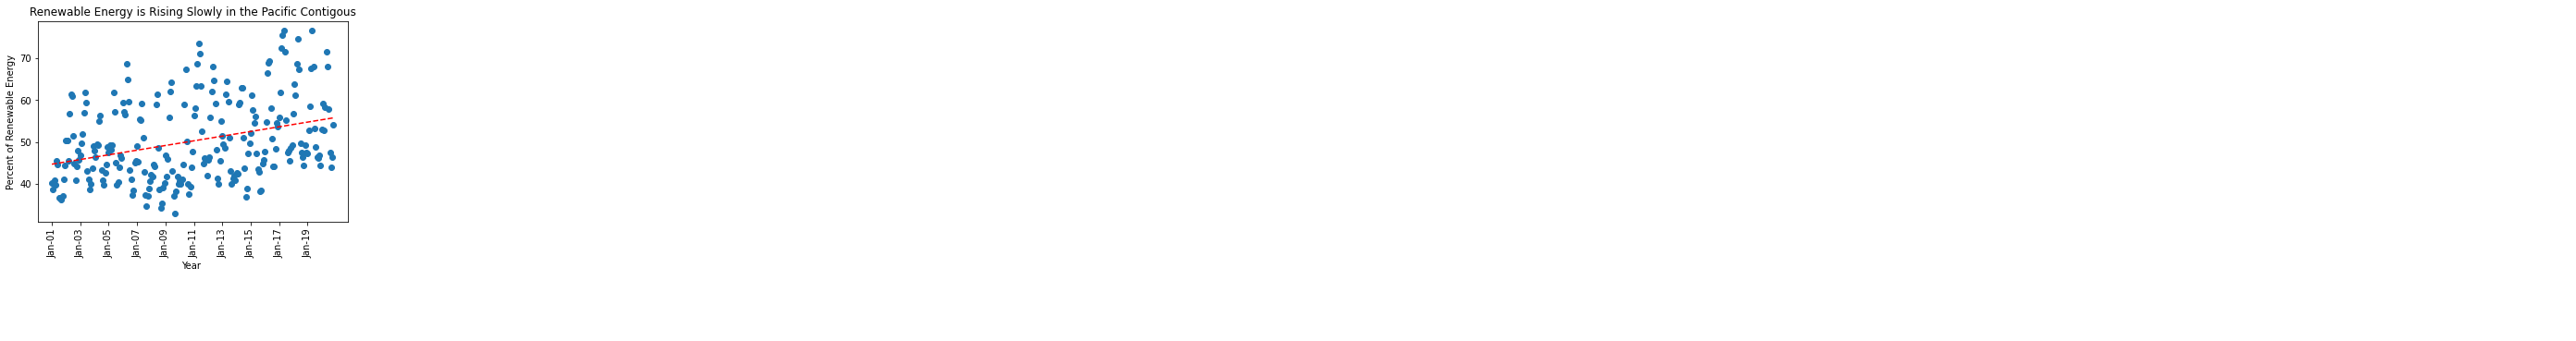

In [113]:
#Graph of renewable energy percentages for the Pacific Contigious

Pyplot= percent_renewable_wc

year=np.arange(2001,2020,12)
percent_renewable_wc=wc_group_totals['Percent renewable']
plt.scatter(percent_renewable_wc.index,percent_renewable_wc)
plt.xticks(percent_renewable_wc.index, rotation='vertical')

plt.locator_params(axis='y', nbins=6)
plt.locator_params(axis='x', nbins=10)

plt.xlabel('Year ')
plt.ylabel('Percent of Renewable Energy')
plt.title('Renewable Energy is Rising Slowly in the Pacific Contigous')


prwc_slope, prwc_int, prwc_r, prwc_p, prwc_std_err = stats.linregress(np.arange(len(percent_renewable_wc)), percent_renewable_wc)
prwc_fit = prwc_slope * np.arange(len(percent_renewable_wc)) + prwc_int
plt.plot(np.arange(len(percent_renewable_wc)),prwc_fit,"--", color='red')

line_eq_wc = "y = " + str(round(prwc_slope,2)) + "x " + str(round(prwc_int,2))
plt.annotate(line_eq_wc,(2002,5),fontsize=20,color="red")
plt.savefig("RenewableRegressionPacificContigious.png")

plt.show()

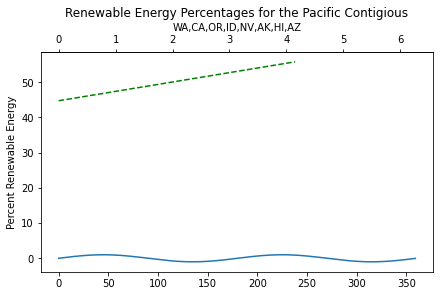

In [112]:
fig, ax = plt.subplots(constrained_layout=True)
x = np.arange(0, 360, 1)
y = np.sin(2 * x * np.pi / 180)
ax.plot(x, y)
ax.set_xlabel('')
ax.set_ylabel('Percent Renewable Energy')
ax.set_title('Renewable Energy Percentages for the Pacific Contigious')

prwc_slope, prwc_int, prwc_r, prwc_p, prwc_std_err = stats.linregress(np.arange(len(percent_renewable_wc)), percent_renewable_wc)
prwc_fit = prwc_slope * np.arange(len(percent_renewable_wc)) + prwc_int
plt.plot(np.arange(len(percent_renewable_wc)),prwc_fit,"--", color='green')


def deg2rad(x):
    return x * np.pi / 180


def rad2deg(x):
    return x * 180 / np.pi


secax = ax.secondary_xaxis('top', functions=(deg2rad, rad2deg))
secax.set_xlabel('WA,CA,OR,ID,NV,AK,HI,AZ')
plt.show()

In [56]:
# Group energy sources by renewables and nonrenewables 
renewables = ["conventional hydroelectric", "other renewables", "wind", "all utility-scale solar", "biomass", "wood and wood-derived fuels", "other biomass", "hydro-electric pumped storage", "all solar", "small-scale solar photovoltaic"]
nonrenewables = ["coal", "petroleum liquids", "petroleum coke", "natural gas", "other gases"]

energy_type.append(renewables)
energy_type.append(nonrenewables)

energy_type

[['conventional hydroelectric',
  'other renewables',
  'wind',
  'all utility-scale solar',
  'biomass',
  'wood and wood-derived fuels',
  'other biomass',
  'hydro-electric pumped storage',
  'all solar',
  'small-scale solar photovoltaic'],
 ['coal', 'petroleum liquids', 'petroleum coke', 'natural gas', 'other gases'],
 ['conventional hydroelectric',
  'other renewables',
  'wind',
  'all utility-scale solar',
  'biomass',
  'wood and wood-derived fuels',
  'other biomass',
  'hydro-electric pumped storage',
  'all solar',
  'small-scale solar photovoltaic'],
 ['coal', 'petroleum liquids', 'petroleum coke', 'natural gas', 'other gases']]

In [25]:
# Rename description column to location 
energy_df.rename(columns = {"description": "Location"}, inplace= True)
energy_df

3,Location,Energy_Source,units,source key,Jan-01,Feb-01,Mar-01,Apr-01,May-01,Jun-01,...,Feb-20,Mar-20,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20
6,United States,all fuels (utility-scale),thousand megawatthours,ELEC.GEN.ALL-US-99.M,332493,282940,300707,278079,300492,327694,...,317853,306887,275763,304167,352967,414610,399812,334167,314401,301776
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-99.M,177287,149735,155269,140671,151593,162616,...,56101,50643,40593,46529,65274,89845,91165,68396,59840,61291
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-99.M,17300,9626,10981,10237,9641,10997,...,766,715,636,707,865,963,926,795,911,761
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-99.M,812,716,752,627,749,825,...,500,684,591,587,808,907,809,457,322,643
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-99.M,42389,37967,44364,45843,50934,57603,...,125554,123654,107929,115855,143180,185433,174130,141407,131644,107821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,Hawaii,hydro-electric pumped storage,thousand megawatthours,ELEC.GEN.HPS-HI-99.M,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1303,Hawaii,other,thousand megawatthours,ELEC.GEN.OTH-HI-99.M,12,12,5,15,17,19,...,25,30,23,27,21,30,28,21,19,31
1304,Hawaii,all solar,thousand megawatthours,ELEC.GEN.TSN-HI-99.M,--,--,--,--,--,--,...,119,136,153,167,164,168,167,155,140,123
1305,Hawaii,small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-99.M,--,--,--,--,--,--,...,87,99,107,114,113,116,115,106,99,87


In [26]:
energy_df.Location.unique()

array(['United States ', 'New England', 'New England ', 'Connecticut',
       'Connecticut ', 'Maine', 'Maine ', 'Massachusetts',
       'Massachusetts ', 'New Hampshire', 'New Hampshire ',
       'Rhode Island', 'Rhode Island ', 'Vermont', 'Vermont ',
       'Middle Atlantic', 'Middle Atlantic ', 'New Jersey', 'New Jersey ',
       'New York', 'New York ', 'Pennsylvania', 'Pennsylvania ',
       'East North Central', 'East North Central ', 'Illinois',
       'Illinois ', 'Indiana', 'Indiana ', 'Michigan', 'Michigan ',
       'Ohio', 'Ohio ', 'Wisconsin', 'Wisconsin ', 'West North Central',
       'West North Central ', 'Iowa', 'Iowa ', 'Kansas', 'Kansas ',
       'Minnesota', 'Minnesota ', 'Missouri', 'Missouri ', 'Nebraska',
       'Nebraska ', 'North Dakota', 'North Dakota ', 'South Dakota',
       'South Dakota ', 'South Atlantic', 'South Atlantic ', 'Delaware',
       'Delaware ', 'District Of Columbia', 'District Of Columbia ',
       'Florida', 'Florida ', 'Georgia', 'Georgia ',

In [27]:
#find breakout the national data into separate dataframe
USA_df=energy_df.loc[energy_df["Location"]== "United States "]
USA_df

3,Location,Energy_Source,units,source key,Jan-01,Feb-01,Mar-01,Apr-01,May-01,Jun-01,...,Feb-20,Mar-20,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20
6,United States,all fuels (utility-scale),thousand megawatthours,ELEC.GEN.ALL-US-99.M,332493,282940,300707,278079,300492,327694,...,317853,306887,275763,304167,352967,414610,399812,334167,314401,301776
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-99.M,177287,149735,155269,140671,151593,162616,...,56101,50643,40593,46529,65274,89845,91165,68396,59840,61291
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-99.M,17300,9626,10981,10237,9641,10997,...,766,715,636,707,865,963,926,795,911,761
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-99.M,812,716,752,627,749,825,...,500,684,591,587,808,907,809,457,322,643
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-99.M,42389,37967,44364,45843,50934,57603,...,125554,123654,107929,115855,143180,185433,174130,141407,131644,107821
11,United States,other gases,thousand megawatthours,ELEC.GEN.OOG-US-99.M,718,676,769,698,785,733,...,1132,1009,747,808,756,854,1002,947,897,938
12,United States,nuclear,thousand megawatthours,ELEC.GEN.NUC-US-99.M,68707,61272,62141,56003,61512,68023,...,65950,63997,59170,64338,67205,69385,68982,65727,59362,61760
13,United States,conventional hydroelectric,thousand megawatthours,ELEC.GEN.HYC-US-99.M,18852,17473,20477,18013,19176,20728,...,26393,23423,21957,30559,29138,27753,24228,19182,18350,22069
14,United States,other renewables,NaN,ELEC.GEN.AOR-US-99.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,United States,wind,thousand megawatthours,ELEC.GEN.WND-US-99.M,389,431,532,685,635,670,...,29092,29204,29336,28163,29872,22579,22571,23176,29419,33848


In [28]:

SumUS_df=USA_df.drop(["Location", "units", "source key"], axis=1)
SumUS_df

3,Energy_Source,Jan-01,Feb-01,Mar-01,Apr-01,May-01,Jun-01,Jul-01,Aug-01,Sep-01,...,Feb-20,Mar-20,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20
6,all fuels (utility-scale),332493,282940,300707,278079,300492,327694,357614,370533,306929,...,317853,306887,275763,304167,352967,414610,399812,334167,314401,301776
7,coal,177287,149735,155269,140671,151593,162616,179060,183116,154158,...,56101,50643,40593,46529,65274,89845,91165,68396,59840,61291
8,petroleum liquids,17300,9626,10981,10237,9641,10997,10050,13235,6432,...,766,715,636,707,865,963,926,795,911,761
9,petroleum coke,812,716,752,627,749,825,992,994,911,...,500,684,591,587,808,907,809,457,322,643
10,natural gas,42389,37967,44364,45843,50934,57603,73030,78410,60181,...,125554,123654,107929,115855,143180,185433,174130,141407,131644,107821
11,other gases,718,676,769,698,785,733,840,848,767,...,1132,1009,747,808,756,854,1002,947,897,938
12,nuclear,68707,61272,62141,56003,61512,68023,69166,68389,63378,...,65950,63997,59170,64338,67205,69385,68982,65727,59362,61760
13,conventional hydroelectric,18852,17473,20477,18013,19176,20728,18079,18914,15256,...,26393,23423,21957,30559,29138,27753,24228,19182,18350,22069
14,other renewables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,wind,389,431,532,685,635,670,635,577,490,...,29092,29204,29336,28163,29872,22579,22571,23176,29419,33848


In [29]:
SumUS_df=SumUS_df.set_index("Energy_Source")
SumU_df=SumUS_df.dropna()
SumU_df

3,Jan-01,Feb-01,Mar-01,Apr-01,May-01,Jun-01,Jul-01,Aug-01,Sep-01,Oct-01,...,Feb-20,Mar-20,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20
Energy_Source,,,,,,,,,,,,,,,,,,,,,
all fuels (utility-scale),332493,282940,300707,278079,300492,327694,357614,370533,306929,294734,...,317853,306887,275763,304167,352967,414610,399812,334167,314401,301776
coal,177287,149735,155269,140671,151593,162616,179060,183116,154158,148931,...,56101,50643,40593,46529,65274,89845,91165,68396,59840,61291
petroleum liquids,17300,9626,10981,10237,9641,10997,10050,13235,6432,5573,...,766,715,636,707,865,963,926,795,911,761
petroleum coke,812,716,752,627,749,825,992,994,911,961,...,500,684,591,587,808,907,809,457,322,643
natural gas,42389,37967,44364,45843,50934,57603,73030,78410,60181,56376,...,125554,123654,107929,115855,143180,185433,174130,141407,131644,107821
other gases,718,676,769,698,785,733,840,848,767,737,...,1132,1009,747,808,756,854,1002,947,897,938
nuclear,68707,61272,62141,56003,61512,68023,69166,68389,63378,60461,...,65950,63997,59170,64338,67205,69385,68982,65727,59362,61760
conventional hydroelectric,18852,17473,20477,18013,19176,20728,18079,18914,15256,15235,...,26393,23423,21957,30559,29138,27753,24228,19182,18350,22069
wind,389,431,532,685,635,670,635,577,490,607,...,29092,29204,29336,28163,29872,22579,22571,23176,29419,33848


In [32]:
#SumU_df.agg([])
transpo_USA_df=USA_df.T #switches the dataframe to make the dates the rows
transpo_USA_df

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
3,,,,,,,,,,,,,,,,,,,,
Location,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
Energy_Source,all fuels (utility-scale),coal,petroleum liquids,petroleum coke,natural gas,other gases,nuclear,conventional hydroelectric,other renewables,wind,all utility-scale solar,geothermal,biomass,wood and wood-derived fuels,other biomass,hydro-electric pumped storage,other,all solar,small-scale solar photovoltaic,all utility-scale solar
units,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,NaN,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours
source key,ELEC.GEN.ALL-US-99.M,ELEC.GEN.COW-US-99.M,ELEC.GEN.PEL-US-99.M,ELEC.GEN.PC-US-99.M,ELEC.GEN.NG-US-99.M,ELEC.GEN.OOG-US-99.M,ELEC.GEN.NUC-US-99.M,ELEC.GEN.HYC-US-99.M,ELEC.GEN.AOR-US-99.M,ELEC.GEN.WND-US-99.M,ELEC.GEN.SUN-US-99.M,ELEC.GEN.GEO-US-99.M,ELEC.GEN.BIO-US-99.M,ELEC.GEN.WWW-US-99.M,ELEC.GEN.WAS-US-99.M,ELEC.GEN.HPS-US-99.M,ELEC.GEN.OTH-US-99.M,ELEC.GEN.TSN-US-99.M,ELEC.GEN.DPV-US-99.M,ELEC.GEN.SUN-US-99.M
Jan-01,332493,177287,17300,812,42389,718,68707,18852,NaN,389,7,1229,4400,3191,1209,-589,992,--,--,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jul-20,414610,89845,963,907,185433,854,69385,27753,NaN,22579,10379,1431,4676,3112,1564,-686,1089,14821,4442,10379
Aug-20,399812,91165,926,809,174130,1002,68982,24228,NaN,22571,9370,1426,4892,3302,1589,-784,1096,13610,4240,9370
Sep-20,334167,68396,795,457,141407,947,65727,19182,NaN,23176,7757,1390,4450,2938,1512,-525,1007,11514,3756,7757


In [33]:
new_header_row=1
transpo_USA_df.columns=transpo_USA_df.iloc[new_header_row]
transpo_USA_df

Energy_Source,all fuels (utility-scale),coal,petroleum liquids,petroleum coke,natural gas,other gases,nuclear,conventional hydroelectric,other renewables,wind,all utility-scale solar,geothermal,biomass,wood and wood-derived fuels,other biomass,hydro-electric pumped storage,other,all solar,small-scale solar photovoltaic,all utility-scale solar
3,,,,,,,,,,,,,,,,,,,,
Location,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
Energy_Source,all fuels (utility-scale),coal,petroleum liquids,petroleum coke,natural gas,other gases,nuclear,conventional hydroelectric,other renewables,wind,all utility-scale solar,geothermal,biomass,wood and wood-derived fuels,other biomass,hydro-electric pumped storage,other,all solar,small-scale solar photovoltaic,all utility-scale solar
units,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,NaN,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours
source key,ELEC.GEN.ALL-US-99.M,ELEC.GEN.COW-US-99.M,ELEC.GEN.PEL-US-99.M,ELEC.GEN.PC-US-99.M,ELEC.GEN.NG-US-99.M,ELEC.GEN.OOG-US-99.M,ELEC.GEN.NUC-US-99.M,ELEC.GEN.HYC-US-99.M,ELEC.GEN.AOR-US-99.M,ELEC.GEN.WND-US-99.M,ELEC.GEN.SUN-US-99.M,ELEC.GEN.GEO-US-99.M,ELEC.GEN.BIO-US-99.M,ELEC.GEN.WWW-US-99.M,ELEC.GEN.WAS-US-99.M,ELEC.GEN.HPS-US-99.M,ELEC.GEN.OTH-US-99.M,ELEC.GEN.TSN-US-99.M,ELEC.GEN.DPV-US-99.M,ELEC.GEN.SUN-US-99.M
Jan-01,332493,177287,17300,812,42389,718,68707,18852,NaN,389,7,1229,4400,3191,1209,-589,992,--,--,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jul-20,414610,89845,963,907,185433,854,69385,27753,NaN,22579,10379,1431,4676,3112,1564,-686,1089,14821,4442,10379
Aug-20,399812,91165,926,809,174130,1002,68982,24228,NaN,22571,9370,1426,4892,3302,1589,-784,1096,13610,4240,9370
Sep-20,334167,68396,795,457,141407,947,65727,19182,NaN,23176,7757,1390,4450,2938,1512,-525,1007,11514,3756,7757


In [34]:
new_header_row=1
transpo_USA_df.columns=transpo_USA_df.iloc[new_header_row]
transpo_USA_df

Energy_Source,all fuels (utility-scale),coal,petroleum liquids,petroleum coke,natural gas,other gases,nuclear,conventional hydroelectric,other renewables,wind,all utility-scale solar,geothermal,biomass,wood and wood-derived fuels,other biomass,hydro-electric pumped storage,other,all solar,small-scale solar photovoltaic,all utility-scale solar
3,,,,,,,,,,,,,,,,,,,,
Location,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
Energy_Source,all fuels (utility-scale),coal,petroleum liquids,petroleum coke,natural gas,other gases,nuclear,conventional hydroelectric,other renewables,wind,all utility-scale solar,geothermal,biomass,wood and wood-derived fuels,other biomass,hydro-electric pumped storage,other,all solar,small-scale solar photovoltaic,all utility-scale solar
units,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,NaN,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours
source key,ELEC.GEN.ALL-US-99.M,ELEC.GEN.COW-US-99.M,ELEC.GEN.PEL-US-99.M,ELEC.GEN.PC-US-99.M,ELEC.GEN.NG-US-99.M,ELEC.GEN.OOG-US-99.M,ELEC.GEN.NUC-US-99.M,ELEC.GEN.HYC-US-99.M,ELEC.GEN.AOR-US-99.M,ELEC.GEN.WND-US-99.M,ELEC.GEN.SUN-US-99.M,ELEC.GEN.GEO-US-99.M,ELEC.GEN.BIO-US-99.M,ELEC.GEN.WWW-US-99.M,ELEC.GEN.WAS-US-99.M,ELEC.GEN.HPS-US-99.M,ELEC.GEN.OTH-US-99.M,ELEC.GEN.TSN-US-99.M,ELEC.GEN.DPV-US-99.M,ELEC.GEN.SUN-US-99.M
Jan-01,332493,177287,17300,812,42389,718,68707,18852,NaN,389,7,1229,4400,3191,1209,-589,992,--,--,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jul-20,414610,89845,963,907,185433,854,69385,27753,NaN,22579,10379,1431,4676,3112,1564,-686,1089,14821,4442,10379
Aug-20,399812,91165,926,809,174130,1002,68982,24228,NaN,22571,9370,1426,4892,3302,1589,-784,1096,13610,4240,9370
Sep-20,334167,68396,795,457,141407,947,65727,19182,NaN,23176,7757,1390,4450,2938,1512,-525,1007,11514,3756,7757


In [62]:

year = 2020
print(f"The forecasted percentage of renewable energy in the Pacific Contigious in 2020 is {round(prwc_slope * year + prwc_int,2)}%.")
year2 = 2021
print(f"The forecasted percentage of renewable energy in the Pacific Contigious in 2021 is {round(prwc_slope * year2 + prwc_int,2)}%.")

NameError: name 'prwc_slope' is not defined